In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [2]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Four very pleasant, on time..."
1,Not Verified | We travel extensively over 25...
2,✅ Trip Verified | Flight delayed an hour due ...
3,✅ Trip Verified | A very full flight made Pre...
4,✅ Trip Verified | The worst airline I’ve ever ...


In [7]:
df.to_csv("data/BA_reviews.csv")

In [10]:
import pandas as pd
import re

# Load the data
df = pd.read_csv('data/BA_reviews.csv')

# Function to clean text data
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces and newlines
    text = re.sub(r"[^a-zA-Z0-9.,!?/:;\"'() ]", '', text)  # Keep only alphanumeric and selected punctuation
    return text.strip()

# Apply cleaning function to the reviews
df['Review'] = df['reviews'].apply(clean_text)

# Save the cleaned data
df.to_csv('data/cleaned_BA_reviews.csv', index=False)

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Load cleaned data
df = pd.read_csv('data/cleaned_BA_reviews.csv')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply function to reviews
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Save the sentiment data
df.to_csv('data/sentiment_BA_reviews.csv', index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\reuel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


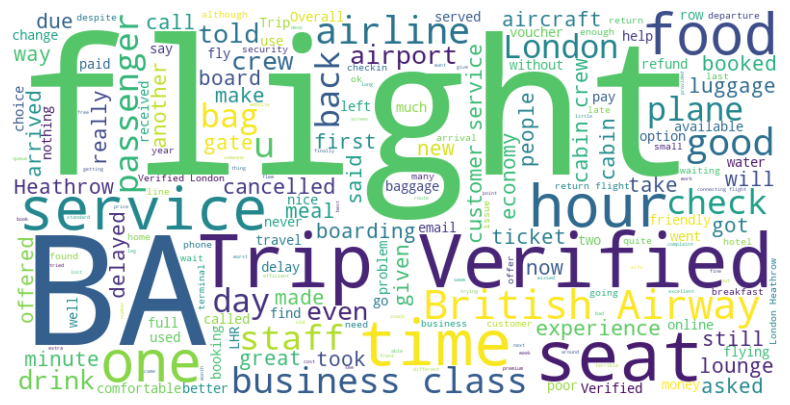

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load sentiment data
df = pd.read_csv('data/sentiment_BA_reviews.csv')

# Combine all reviews into one large text
text = ' '.join(review for review in df['Review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
import encodings
sorted(set(encodings.aliases.aliases.values()))
import pandas as pd

try:
    # Attempt to read the CSV with ISO-8859-1 encoding
    data = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    # If ISO-8859-1 fails, try windows-1252
    data = pd.read_csv('customer_booking.csv', encoding='windows-1252')

# Inspect the data
print(data.head())
print(data.info())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load data
data = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']  # Assuming these are the categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8562
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



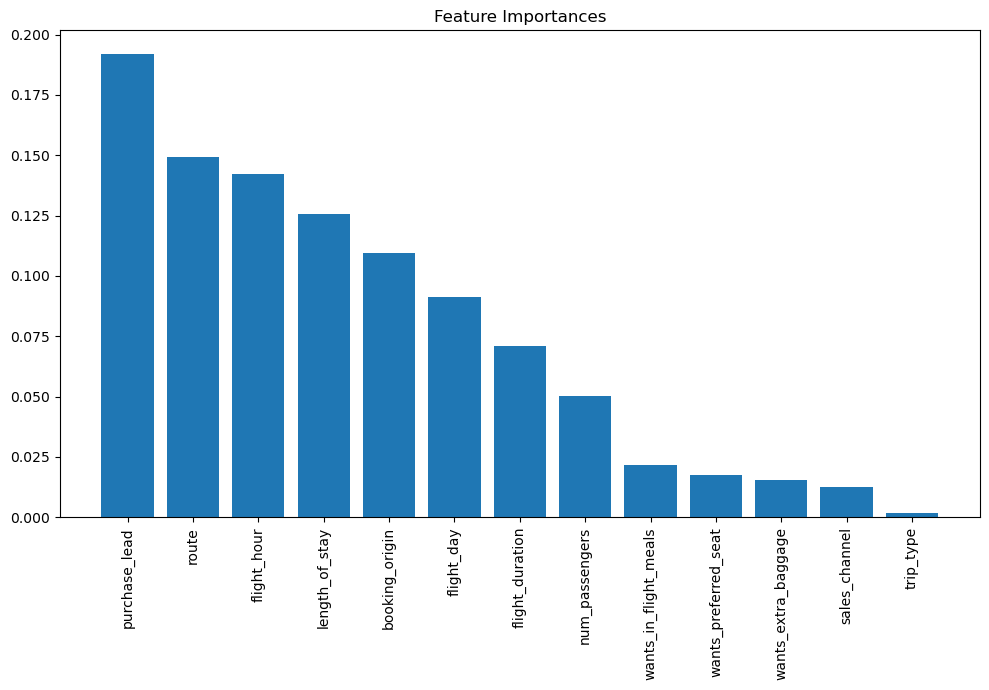

In [20]:
import matplotlib.pyplot as plt

# Get feature importances
importances = clf.feature_importances_

# Sort the feature importances in descending order and match the names
sorted_indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 7))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()